In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score,precision_score
RANDOM_SEED = 2021
TEST_PCT = 0.3
LABELS = ["Normal","Fraud"]


In [14]:
dataset = pd.read_csv("creditcard.csv")

In [16]:
print("Any nulls in the dataset",dataset.isnull().values.any())
print('-------')
print("No. of unique labels",len(dataset['Class'].unique()))
print("Label values",dataset.Class.unique())

Any nulls in the dataset True
-------
No. of unique labels 3
Label values [ 0.  1. nan]


In [17]:
print('-------')
print("Break down of Normal and Fraud Transcations")
print(pd.value_counts(dataset['Class'],sort=True))

-------
Break down of Normal and Fraud Transcations
0.0    3970
1.0       2
Name: Class, dtype: int64


Text(0, 0.5, 'Number of Observations')

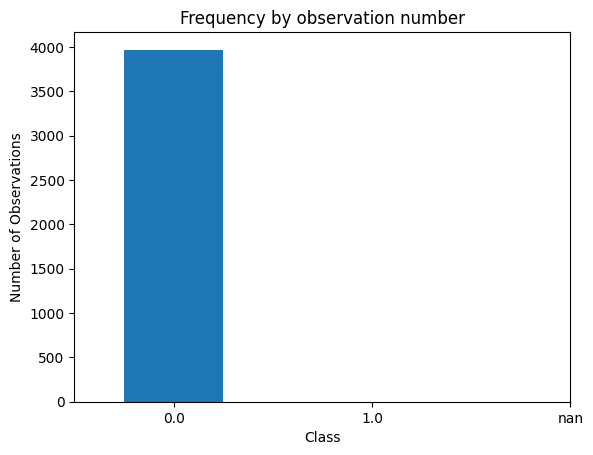

In [18]:
count_classes = pd.value_counts(dataset['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.xticks(range(len(dataset['Class'].unique())),dataset.Class.unique())
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations")

In [19]:
normal_dataset = dataset[dataset.Class == 0]
fraud_dataset = dataset[dataset.Class == 1]

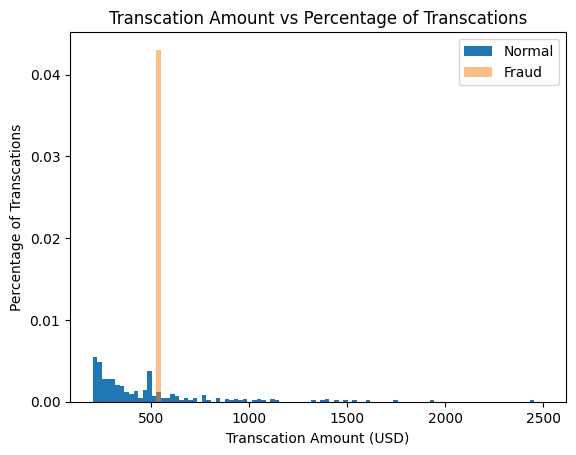

In [21]:
bins = np.linspace(200,2500,100)
plt.hist(normal_dataset.Amount,bins=bins,alpha=1,density=True,label='Normal')
plt.hist(fraud_dataset.Amount,bins=bins,alpha=0.5,density=True,label='Fraud')
plt.legend(loc='upper right')
plt.title("Transcation Amount vs Percentage of Transcations")
plt.xlabel("Transcation Amount (USD)")
plt.ylabel("Percentage of Transcations")
plt.show()


In [22]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,3617,1.134592,0.252051,0.488592,0.799826,-0.264819,-0.369918,-0.243365,0.049761,1.210818,...,-0.351115,-0.851463,0.186169,0.092463,0.020015,0.057976,-0.046611,0.012562,13.99,0.0
3969,3621,-1.338671,1.080974,1.291196,0.719258,0.101320,0.053896,0.001297,-0.917575,1.638510,...,0.498030,-0.483932,0.037686,0.053566,-0.560078,0.230423,-0.119911,0.321847,27.43,0.0
3970,3622,-0.339728,-2.417449,0.975517,2.537995,-1.720361,0.863005,0.032965,0.026764,2.487139,...,0.391639,0.264432,-0.735031,0.450594,0.310022,-0.231357,-0.049872,0.153526,730.32,0.0
3971,3623,-0.368639,0.947432,1.707755,0.932092,0.292956,0.189100,0.499330,0.132466,0.779412,...,-0.119045,0.056665,-0.172703,0.170073,0.139605,-0.420518,0.033794,0.005996,6.87,0.0


In [23]:
sc = StandardScaler()
dataset['Time'] = sc.fit_transform(dataset['Time'].values.reshape(-1,1))
dataset['Amount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1,1))

In [25]:
raw_data = dataset.values
#The last element contains if the transcation is normal which is represented by 0 and if fraud then 1
labels = raw_data[:,-1]
#The other data points are the electrocadriogram data
data = raw_data[:,0:-1]
train_data,test_data,train_labels,test_labels =train_test_split(data,labels,test_size = 0.2,random_state =2021)


In [26]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)
train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)
train_data = tf.cast(train_data,tf.float32)
test_data = tf.cast(test_data,tf.float32)

In [27]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)
#Creating normal and fraud datasets
normal_train_data = train_data[~train_labels]
normal_test_data = test_data[~test_labels]
fraud_train_data = train_data[train_labels]
fraud_test_data = test_data[test_labels]
print("No. of records in Fraud Train Data=",len(fraud_train_data))
print("No. of records in Normal Train Data=",len(normal_train_data))
print("No. of records in Fraud Test Data=",len(fraud_test_data))
print("No. of records in Normal Test Data=",len(normal_test_data))


No. of records in Fraud Train Data= 2
No. of records in Normal Train Data= 3176
No. of records in Fraud Test Data= 1
No. of records in Normal Test Data= 794


In [28]:
nb_epoch = 20
batch_size = 64
input_dim = normal_train_data.shape[1]
#num of columns,30
encoding_dim = 14
hidden_dim1 = int(encoding_dim / 2)
hidden_dim2 = 4
learning_rate = 1e-7

In [30]:
 #input layer
input_layer = tf.keras.layers.Input(shape=(input_dim,))
#Encoder
encoder = tf.keras.layers.Dense(encoding_dim,activation="tanh",activity_regularizer = tf.keras.regularizers.l2(learning_rate))(input_layer)
encoder = tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim1,activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim2,activation=tf.nn.leaky_relu)(encoder)

In [31]:
#Decoder
decoder = tf.keras.layers.Dense(hidden_dim1,activation='relu')(encoder)
decoder = tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim,activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim,activation='tanh')(decoder)

In [32]:
#Autoencoder
autoencoder = tf.keras.Model(inputs = input_layer,outputs = decoder)
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 14)                434       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 4)                 32        
                                                                 
 dense_3 (Dense)             (None, 7)                 35        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0     

In [34]:
 cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.h5",mode='min',monitor='val_loss',verbose=2,save_best_only=True)
#Define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
  monitor='val_loss',
  min_delta=0.0001,
  patience=10,
  verbose=11,
  mode='min',
  restore_best_weights=True
)

In [36]:
autoencoder.compile(metrics=['accuracy'],loss='mean_squared_error',optimizer='adam')


In [38]:
history = autoencoder.fit(normal_train_data,normal_train_data,epochs = nb_epoch,
  batch_size = batch_size,shuffle = True,
  validation_data = (test_data,test_data),
  verbose=1,
  callbacks = [cp,early_stop]).history

Epoch 1/20
48/50 [===========================>..] - ETA: 0s - loss: 0.1188 - accuracy: 0.0244
Epoch 1: val_loss did not improve from inf
50/50 [==============================] - 1s 27ms/step - loss: 0.1160 - accuracy: 0.0255 - val_loss: nan - val_accuracy: 0.0742
Epoch 2/20
42/50 [========================>.....] - ETA: 0s - loss: 0.0147 - accuracy: 0.0324
Epoch 2: val_loss did not improve from inf
50/50 [==============================] - 0s 6ms/step - loss: 0.0137 - accuracy: 0.0381 - val_loss: nan - val_accuracy: 0.2201
Epoch 3/20
38/50 [=====================>........] - ETA: 0s - loss: 0.0073 - accuracy: 0.0481
Epoch 3: val_loss did not improve from inf
50/50 [==============================] - 0s 6ms/step - loss: 0.0071 - accuracy: 0.0441 - val_loss: nan - val_accuracy: 0.2201
Epoch 4/20
47/50 [===========================>..] - ETA: 0s - loss: 0.0053 - accuracy: 0.0495
Epoch 4: val_loss did not improve from inf
50/50 [==============================] - 0s 7ms/step - loss: 0.0052 - acc

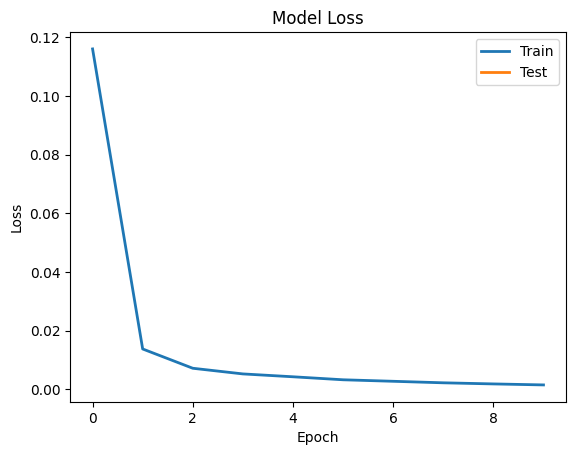

In [39]:
plt.plot(history['loss'],linewidth = 2,label = 'Train')
plt.plot(history['val_loss'],linewidth = 2,label = 'Test')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [40]:
test_x_predictions = autoencoder.predict(test_data)
mse = np.mean(np.power(test_data - test_x_predictions, 2),axis = 1)

25/25 [==============================] - 0s 6ms/step


In [42]:
threshold_fixed = 50
groups = error_df.groupby('True_class')
fig,ax = plt.subplots()
for name,group in groups:
  ax.plot(group.index,group.Reconstruction_error,marker='o',ms = 3.5,linestyle='',
  label = "Fraud" if name==1 else "Normal")
  ax.hlines(threshold_fixed,ax.get_xlim()[0],ax.get_xlim()[1],colors="r",zorder=100,label="Threshold")
  ax.legend()
plt.title("Reconstructions error for normal and fraud data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

NameError: ignored

In [43]:
threshold_fixed = 52
pred_y = [1 if e > threshold_fixed else 0
    for e in
    error_df.Reconstruction_error.values]
error_df['pred'] = pred_y
conf_matrix = confusion_matrix(error_df.True_class,pred_y)

NameError: ignored